In [24]:
#Target: A target market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.
#Task:
#Q1: What was the best Year for sales? How much was earned that Year?
#Q2: What was the best month for sales? How much was earned that month?
#Q3: What City had the highest number of sales?
#Q4: What time should we display adverstisement to maximize likelihood of customer's buying product?
#Q5: What products are most often sold together?
#Q6: What product sold the most? Why do you think it sold the most?

#How Much Probability?
#How much probability for next people will ordered iPhone?
#How much probability for next people will ordered Google Phone?
#How much probability other peoples will ordered Wired Headphones?

In [7]:
#Import libraries
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#Import 12 excel csv file into 1 dataframe

df_1= pd.read_csv('Data/Sales_January_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_2= pd.read_csv('Data/Sales_February_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_3= pd.read_csv('Data/Sales_March_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_4= pd.read_csv('Data/Sales_April_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_5= pd.read_csv('Data/Sales_May_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_6= pd.read_csv('Data/Sales_June_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_7= pd.read_csv('Data/Sales_July_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_8= pd.read_csv('Data/Sales_August_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_9= pd.read_csv('Data/Sales_September_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_10= pd.read_csv('Data/Sales_October_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_11= pd.read_csv('Data/Sales_November_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
df_12= pd.read_csv('Data/Sales_December_2019.csv', sep=",", parse_dates=['Order Date'], dayfirst=True)
    
df= pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12])

df.to_csv('final_data.csv',index=False)
    

In [9]:
#Read new data file
sales_data = pd.read_csv('final_data.csv',sep=",", parse_dates=['Order Date'], dayfirst=True)
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [10]:
#Check null
sales_data.isnull().sum()
#Drop null
sales_data= sales_data.dropna(how='all')
sales_data.isnull().sum()
sales_data.tail()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [11]:
#Check each row for problem values
print(sales_data['Product'].unique)
print(sales_data['Quantity Ordered'].unique())
#Remove the 'Quantity Ordered' row
sales_data=sales_data[sales_data['Quantity Ordered'] != 'Quantity Ordered']
print(sales_data['Quantity Ordered'].unique())

<bound method Series.unique of 0                             iPhone
1           Lightning Charging Cable
2                   Wired Headphones
3                   27in FHD Monitor
4                   Wired Headphones
                     ...            
186845      Lightning Charging Cable
186846         AA Batteries (4-pack)
186847               Vareebadd Phone
186848              Wired Headphones
186849    Bose SoundSport Headphones
Name: Product, Length: 186305, dtype: object>
['1' '2' '3' '5' '4' '7' 'Quantity Ordered' '6' '9' '8']
['1' '2' '3' '5' '4' '7' '6' '9' '8']


In [12]:
#Change type of data
sales_data['Quantity Ordered'],sales_data['Price Each'],sales_data['Order Date']= sales_data['Quantity Ordered'].astype('int'),sales_data['Price Each'].astype('float'), pd.to_datetime(sales_data['Order Date'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


In [13]:
#Q1: What was the best Year for sales? How much was earned that Year?
sales_data['Year']= sales_data['Order Date'].dt.year
sales_data['Earning']= sales_data['Quantity Ordered']*sales_data['Price Each']
print(sales_data[sales_data['Year']== 2019]['Earning'].sum())
print(sales_data[sales_data['Year']== 2020]['Earning'].sum())
#Answer: 2020 is better year for sales. Total earning is 34.483.365$

34483365.67999999
8670.29


In [14]:
#Q2: What was the best month for sales? How much was earned that month?
sales_data['Month']= sales_data['Order Date'].dt.month
month=list(sales_data['Month'].unique())
sales_month=[]
for i in month:
    sales_month.append(sales_data[sales_data['Month']==i]['Earning'].sum())
print(month)
print(sales_month)
#Answer: December is best month for sales. Total earning is 4.614.443$

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1822256.73, 2202022.42, 2807100.38, 3390670.2399999998, 3152606.7499999995, 2577802.26, 2647775.76, 2244467.88, 2097560.13, 3736726.8799999994, 3199603.1999999997, 4613443.339999999]


[3661642.01, 2320490.61, 8262203.909999999, 5452570.8, 1819581.7499999998, 2795498.58, 2747755.4799999995, 4664317.43, 2767975.3999999994]
[' Boston', ' Portland', ' San Francisco', ' Los Angeles', ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas']


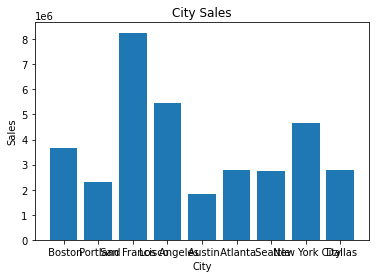

In [15]:
#Q3: What City had the highest number of sales?
sales_data['City']=sales_data['Purchase Address'].str.split(',').str[1]
city= list(sales_data['City'].unique())
sales_city=[]

for i in city:
    sales_city.append(sales_data[sales_data['City']==i]['Earning'].sum())

print(sales_city)
print(city)

plt.bar(city, sales_city)
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('City Sales')
plt.show()

#Answer: San Francisco 

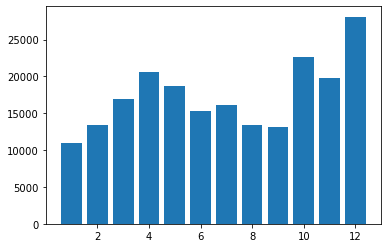

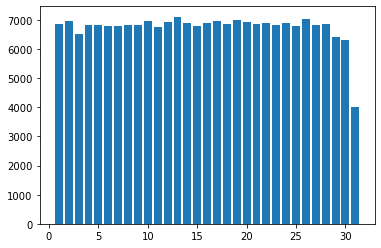

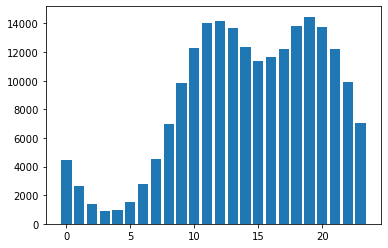

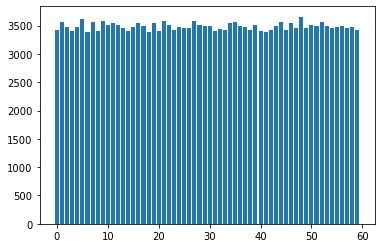

In [16]:
#Q4: What time should we display adverstisement to maximize likelihood of customer's buying product?
sales_data['Day']= sales_data['Order Date'].dt.day
sales_data['Hour']= sales_data['Order Date'].dt.hour
sales_data['Minute']= sales_data['Order Date'].dt.minute
day= list(sales_data['Day'].unique())
hour= list(sales_data['Hour'].unique())
minute= list(sales_data['Minute'].unique())

quant_month=[]
quant_day=[]
quant_hour=[]
quant_minute=[]

for i in month:
    quant_month.append(sales_data[sales_data['Month']==i]['Quantity Ordered'].sum())
for j in day:
    quant_day.append(sales_data[sales_data['Day']==j]['Quantity Ordered'].sum())
for k in hour:
    quant_hour.append(sales_data[sales_data['Hour']==k]['Quantity Ordered'].sum())
for l in minute:
    quant_minute.append(sales_data[sales_data['Minute']==l]['Quantity Ordered'].sum())

plt.bar(month,quant_month)
plt.show()    
plt.bar(day,quant_day)
plt.show()
plt.bar(hour,quant_hour)
plt.show()
plt.bar(minute,quant_minute)
plt.show()
#Answer: December is the best month for advertising. There a litte different between day in months. 
# We should put avertisment from 10:00 to 21:00 and exact minutes seems to have no impact

In [17]:
#Q5: What products are most often sold together?
grouped = sales_data.groupby('Order ID')['Product'].apply(list).reset_index()
grouped = grouped[grouped.Product.apply(lambda x : len(x)) >= 2]

grouped_product= list(grouped['Product'])
grouped_product

from collections import Counter

# Count the occurrences of each value in a list

counts = Counter([tuple(sublist) for sublist in grouped_product])

# Print the result
print(counts)

#Answer: iPhone and Lightning Charging Cable

Counter({('iPhone', 'Lightning Charging Cable'): 882, ('Google Phone', 'USB-C Charging Cable'): 856, ('iPhone', 'Wired Headphones'): 361, ('Vareebadd Phone', 'USB-C Charging Cable'): 312, ('Google Phone', 'Wired Headphones'): 303, ('iPhone', 'Apple Airpods Headphones'): 286, ('Google Phone', 'Bose SoundSport Headphones'): 161, ('Vareebadd Phone', 'Wired Headphones'): 104, ('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 77, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 60, ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 56, ('Lightning Charging Cable', 'USB-C Charging Cable'): 55, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 52, ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 51, ('Lightning Charging Cable', 'Lightning Charging Cable'): 51, ('AAA Batteries (4-pack)', 'USB-C Charging Cable'): 50, ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 48, ('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 48, ('USB-C Charging Cable', 'USB-C

In [18]:
#Q6: What product sold the most? Why do you think it sold the most?
sales_data.groupby('Product')['Quantity Ordered'].sum()
#Answer: AAA Batteries (4-pack). It is cheap and needed for many devices 

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [21]:
#How much probability for next people will ordered USB-C Charging Cable?
n=sales_data['Quantity Ordered'].sum()
usb=sales_data[sales_data['Product']=='USB-C Charging Cable']['Quantity Ordered'].sum()
print(usb/n)
#Answer: 11.4%

0.11466957465838272


In [23]:
#How much probability for next people will ordered iPhone?
iphone=sales_data[sales_data['Product']=='iPhone']['Quantity Ordered'].sum()
print(iphone/n)
#Answer: 3.27%

0.03275795273556885


In [25]:
#How much probability for next people will ordered Google Phone?
google=sales_data[sales_data['Product']=='Google Phone']['Quantity Ordered'].sum()
print(google/n)
#Answer: 2.65%

0.02645889831116468


In [26]:
#How much probability other peoples will ordered Wired Headphones?
wired=sales_data[sales_data['Product']=='Wired Headphones']['Quantity Ordered'].sum()
print(wired/n)
#Answer: 9.83%

0.0983216870178258


In [27]:
#Get a csv file for power BI dashboard
sales_data.to_csv('sales_data.csv',index=False)